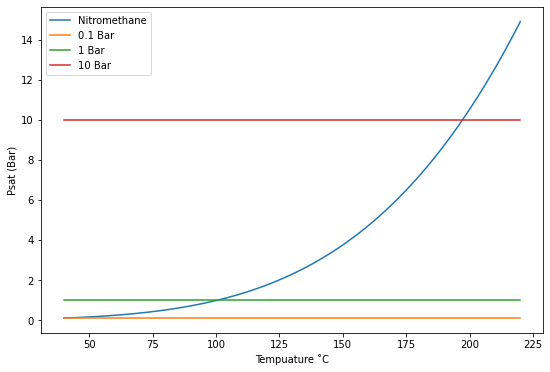

In [59]:
import sys
import os 
import numpy as np 
import matplotlib.pyplot as plt

#dict 
ant = {'Nitromethane':(14.7513,3331.70,227.600)} 

# This for loop is used to "loop" over the keys and plot the Antoine equation predicted Pi_sat values vs. temprature 
T_range = np.linspace(40,220,101)
for species in ant.keys():
    Psat_range = []
    for T in T_range:
        #print(T)
        A, B, C = ant[species] 
        #print(key, A, B, C)
        ln_psat = A - (B/(T + C))
        psat = np.round(np.exp(ln_psat),2) #kPa
        psat_bar = psat / 100
        #print(T, psat)    
        Psat_range.append(psat_bar)
    import matplotlib.pyplot as plt 
    plt.figure(figsize=[9,6])
    plt.plot(T_range,np.array(Psat_range),'-', label=species)

plt.xlabel('Tempuature ˚C')
plt.ylabel('Psat (Bar)')


plt.plot(T_range,0.1*np.ones(len(T_range)),label='0.1 Bar')
plt.plot(T_range,1*np.ones(len(T_range)),label='1 Bar')
plt.plot(T_range,10*np.ones(len(T_range)),label='10 Bar')

plt.legend()
plt.show()


In [ ]:
from scipy.optimize import fsolve
import numpy as np 

def antoine_psat(T, species):
  '''Take a value of temperature and return the saturation pressure'''

  ant ={'Nitromethane':(14.7513,3331.70,227.600)}  

  A, B, C = ant[species] 
  ln_psat = A - (B/(T + C))
  psat = np.round(np.exp(ln_psat),2)
  return psat 


T = 100 # degC
pi_sat = antoine_psat(T,'Nitromethane')
print(pi_sat)

def func_to_solve(T):
  species = 'Nitromethane'
  pi_sat = antoine_psat(T,species)
  error = pi_sat - 33.7
  return error 

T_guess = 100 #degC 
roots = fsolve(func_to_solve, T_guess)
print(roots)

print('Value of func_to_solve for the initial guess = ', func_to_solve(T_guess))
print('Value of func for the fsolve-calculated roots = ', func_to_solve(roots))
print('The normal bp =', roots)

97.64
[68.97770305]
Value of func_to_solve for the initial guess =  63.94
Value of func for the fsolve-calculated roots =  [0.]
The normal bp = [68.97770305]
